In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt
import torch.optim as optim

In [155]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [156]:
# generate training samples 
K = 500 
X1 = np.linspace(-1,1,K)  
X2 = np.linspace(-1,1,K)
X3 = np.linspace(-1,1,K)
X4 = np.linspace(-1,1,K)
# train X
train_X = [[X1[i], X2[i], X3[i], X4[i]] for i in range(K)]
# train Y
train_Y = [[X1[i]**2 + X2[i]**2 + 2*X3[i]**3 + 4*X4[i]**3] for i in range(K)]
mu, sigma = 0, np.sqrt(0.01)
noise = np.random.normal(mu, sigma, np.shape(train_Y))
train_Y = train_Y + noise 

# generate test samples
T = 25
X1_test = np.concatenate((np.linspace(-2, -1, T), np.linspace(1, 2, T)))
X2_test = np.concatenate((np.linspace(-2, -1, T), np.linspace(1, 2, T)))
X3_test = np.concatenate((np.linspace(-2, -1, T), np.linspace(1, 2, T)))
X4_test = np.concatenate((np.linspace(-2, -1, T), np.linspace(1, 2, T)))
# test X 
test_X = [[X1_test[i], X2_test[i], X3_test[i], X4_test[i]] for i in range(T*2)]
# test Y
test_Y = [[X1_test[i]**2 + X2_test[i]**2 + 2*X3_test[i]**3 + 4*X4_test[i]**3] for i in range(T*2)]

train_input = torch.as_tensor(train_X, dtype=torch.float32, device=device)
train_output = torch.as_tensor(train_Y, dtype=torch.float32, device=device).view(-1, 1)

test_input = torch.as_tensor(test_X, dtype=torch.float32, device=device)
test_output = torch.as_tensor(test_Y, dtype=torch.float32, device=device).view(-1, 1)

In [157]:
class SimpleNetwork1(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,2) 
         self.fc2=nn.Linear(2,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = self.fc2(f_hat)
        return f_hat

SimpleNet1 = SimpleNetwork1().to(device)

In [158]:
class SimpleNetwork2(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,10) 
         self.fc2=nn.Linear(10,10) 
         self.fc3=nn.Linear(10,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet2 = SimpleNetwork2().to(device)

In [159]:
class SimpleNetwork3(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,100) 
         self.fc2=nn.Linear(100,100) 
         self.fc3=nn.Linear(100,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet3 = SimpleNetwork3().to(device)

In [160]:
class SimpleNetwork4(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,20) 
         self.fc2=nn.Linear(20,20) 
         self.fc3=nn.Linear(20,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet4 = SimpleNetwork4().to(device)

In [161]:
class SimpleNetwork5(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,15) 
         self.fc2=nn.Linear(15,15) 
         self.fc3=nn.Linear(15,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet5 = SimpleNetwork5().to(device)

In [162]:
class SimpleNetwork6(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,45) 
         self.fc2=nn.Linear(45,10) 
         self.fc3=nn.Linear(10,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet6 = SimpleNetwork6().to(device)

In [163]:
class SimpleNetwork7(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,10) 
         self.fc2=nn.Linear(10,100) 
         self.fc3=nn.Linear(100,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet7 = SimpleNetwork7().to(device)

In [164]:
class SimpleNetwork8(nn.Module):
    def __init__(self) -> None:
         super().__init__()  
         self.fc1=nn.Linear(4,10) 
         self.fc2=nn.Linear(10,2) 
         self.fc3=nn.Linear(2,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet8 = SimpleNetwork8().to(device)

In [165]:
class SimpleNetwork9(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,20) 
         self.fc2=nn.Linear(20,15) 
         self.fc3=nn.Linear(15,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet9 = SimpleNetwork9().to(device)

In [166]:
class SimpleNetwork10(nn.Module):
    def __init__(self) -> None:
         super().__init__() # 
         self.fc1=nn.Linear(4,35) 
         self.fc2=nn.Linear(35,10) 
         self.fc3=nn.Linear(10,1) 
                                 
    def forward(self,f_hat):
        f_hat = F.relu(self.fc1(f_hat))
        f_hat = F.relu(self.fc2(f_hat))
        f_hat = self.fc3(f_hat)
        return f_hat

SimpleNet10 = SimpleNetwork10().to(device)

In [167]:
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

import matplotlib.pyplot as plt
import torch.optim as optim

In [168]:
train_dataset = TensorDataset(train_input, train_output)
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
print(len(train_dataset))

test_dataset = TensorDataset(test_input, test_output)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
print(len(test_dataset))

500
50


## Simple Net 

In [169]:
def train_and_plot(network, train_loader, test_loader, epochs=25, lr=0.01, momentum=0.9, gamma=0.9):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(network.parameters(), lr=lr, momentum=momentum)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)

    epoch_losses = []
    test_losses = []
    # test_accuracies = []

    for epoch in tqdm(range(epochs)):
        network.train()  # Set the network to training mode
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data
            #print(inputs.shape)
            #print(labels.shape)
            optimizer.zero_grad()
            outputs = network(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_losses.append(epoch_loss)
        scheduler.step()

        # Calculate test loss and accuracy
        network.eval()  # Set the network to evaluation mode
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():  # Disable gradient computation
            for data in test_loader:
                inputs, labels = data
                outputs = network(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        average_test_loss = test_loss / len(test_loader)
        test_losses.append(average_test_loss)
        # test_accuracy = 100 * correct / total
        # test_accuracies.append(test_accuracy)
    
    print("Finished Training")
    params = sum(p.numel() for p in network.parameters())
    print("parameters:", params)

    # Plotting Training Loss, Test Loss, and Test Accuracy
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), epoch_losses, marker='.')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss over Epochs. Total params: {params}')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), test_losses, marker='.')
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss')
    plt.title('Test Loss over Epochs')
    plt.grid()

    plt.tight_layout()
    plt.show()

    return epoch_losses, test_losses, params


100%|██████████| 25/25 [00:02<00:00, 10.52it/s]


Finished Training
parameters: 13


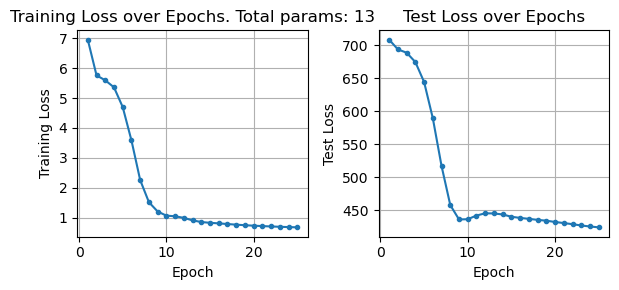

100%|██████████| 25/25 [00:02<00:00,  9.05it/s]

Finished Training
parameters: 171


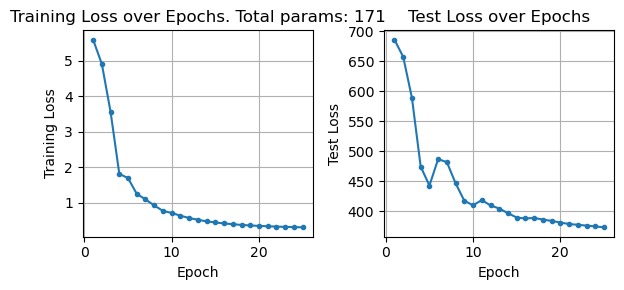

100%|██████████| 25/25 [00:02<00:00,  9.38it/s]

Finished Training
parameters: 10701


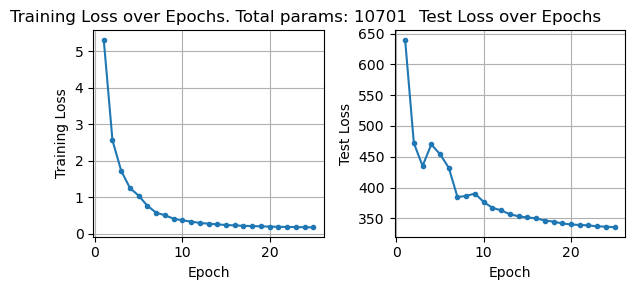

100%|██████████| 25/25 [00:02<00:00,  9.04it/s]

Finished Training
parameters: 541


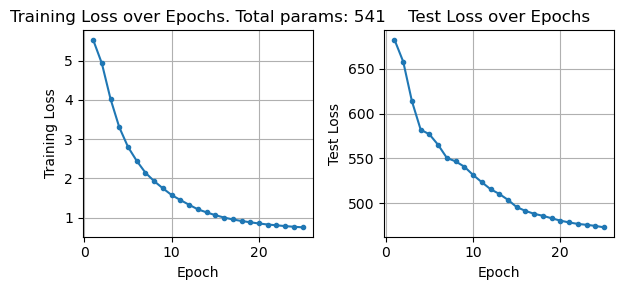

100%|██████████| 25/25 [00:02<00:00,  9.15it/s]

Finished Training
parameters: 331


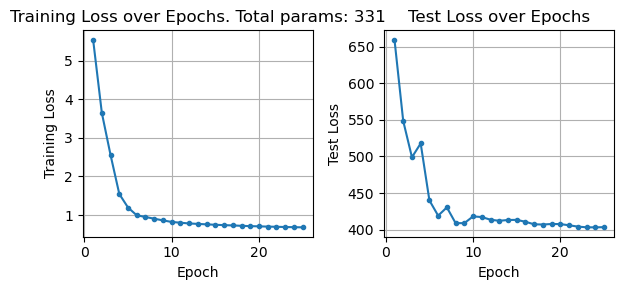

100%|██████████| 25/25 [00:02<00:00,  9.22it/s]


Finished Training
parameters: 696


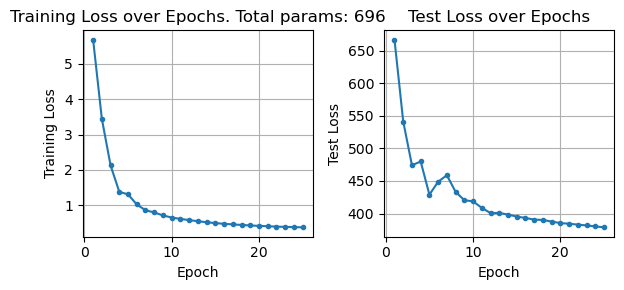

100%|██████████| 25/25 [00:02<00:00, 10.08it/s]

Finished Training
parameters: 1251


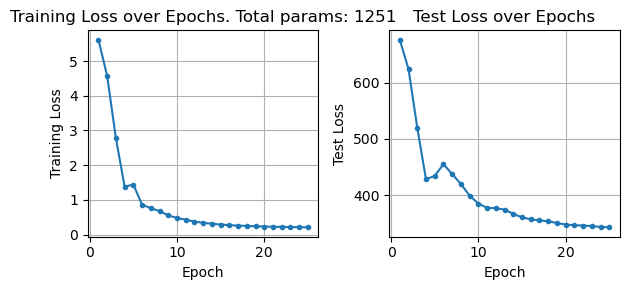

100%|██████████| 25/25 [00:02<00:00, 10.09it/s]

Finished Training
parameters: 75


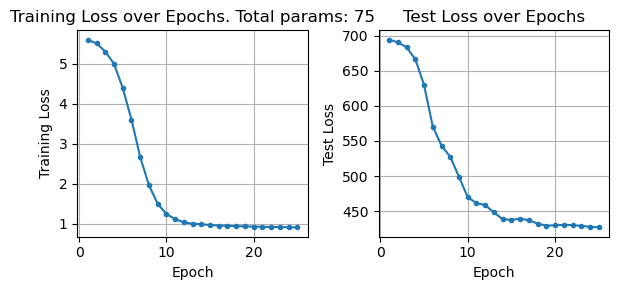

100%|██████████| 25/25 [00:02<00:00, 10.13it/s]

Finished Training
parameters: 431


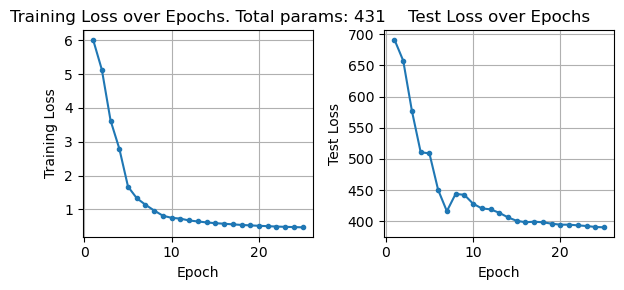

100%|██████████| 25/25 [00:02<00:00, 10.00it/s]

Finished Training
parameters: 546


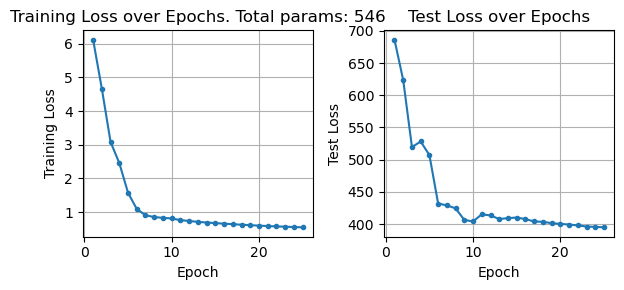

In [170]:
# Assuming SimpleNet1, train_loader, and test_loader are defined
training_losses1, testing_losses1, params1 = train_and_plot(SimpleNet1, train_loader, test_loader)
training_losses2, testing_losses2, params2 = train_and_plot(SimpleNet2, train_loader, test_loader)
training_losses3, testing_losses3, params3 = train_and_plot(SimpleNet3, train_loader, test_loader)
training_losses4, testing_losses4, params4 = train_and_plot(SimpleNet4, train_loader, test_loader)
training_losses5, testing_losses5, params5 = train_and_plot(SimpleNet5, train_loader, test_loader)
training_losses6, testing_losses6, params6 = train_and_plot(SimpleNet6, train_loader, test_loader)
training_losses7, testing_losses7, params7 = train_and_plot(SimpleNet7, train_loader, test_loader)
training_losses8, testing_losses8, params8 = train_and_plot(SimpleNet8, train_loader, test_loader)
training_losses9, testing_losses9, params9 = train_and_plot(SimpleNet9, train_loader, test_loader)
training_losses10, testing_losses10, params10 = train_and_plot(SimpleNet10, train_loader, test_loader)

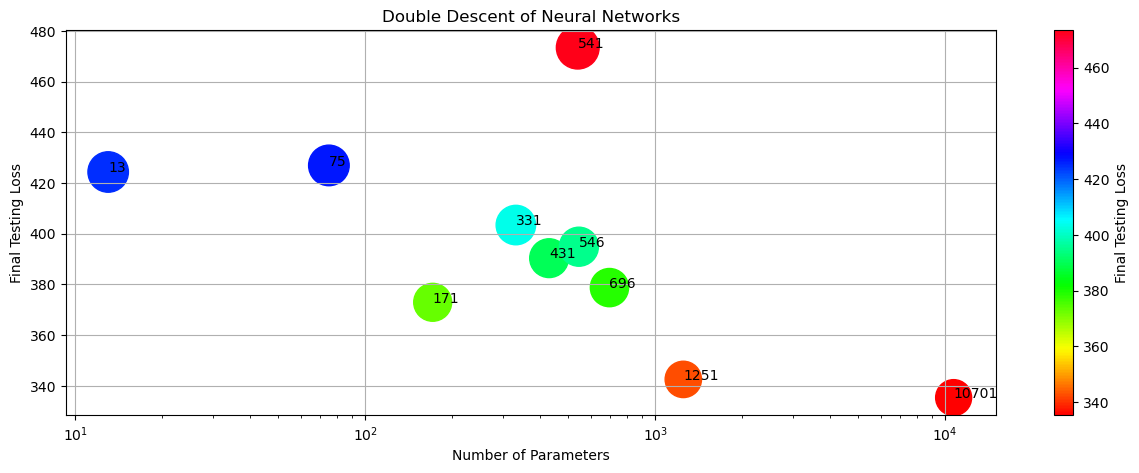

In [171]:
# Collecting the final test loss and parameters of each network
Model_Testing_Performance = [testing_losses1[-1], testing_losses2[-1], testing_losses3[-1],
                             testing_losses4[-1], testing_losses5[-1], testing_losses6[-1],
                             testing_losses7[-1], testing_losses8[-1], testing_losses9[-1], 
                             testing_losses10[-1]]

Model_Parameters = [params1, params2, params3, 
                    params4, params5, params6, 
                    params7, params8, params9, 
                    params10]

# Plotting the Double Descent Curve
fig, ax = plt.subplots(figsize=(15, 5))
colors = Model_Testing_Performance
scatter = ax.scatter(Model_Parameters, Model_Testing_Performance, c=colors, cmap='hsv', s=np.dot(2, Model_Testing_Performance))

for i, txt in enumerate(Model_Parameters):
    ax.annotate(txt, (Model_Parameters[i], Model_Testing_Performance[i]))

ax.set_title("Double Descent of Neural Networks")
ax.set_ylabel("Final Testing Loss")
ax.set_xlabel("Number of Parameters")
ax.set_xscale('log', base=10)
ax.grid()

# Adding a color bar to the plot
plt.colorbar(scatter, ax=ax, orientation='vertical', label='Final Testing Loss')
plt.show()

Upon examination of the model's training, it is observed that the training loss demonstrates a consistent decrease over successive epochs. 
Conversely, the test loss exhibits initial fluctuations before reaching a state of relative stability. 
Notably, the test loss consistently exceeds the training loss, a disparity that may be indicative of overfitting within the model.

Further analysis of the plotted graph above reveals the emergence of a "double descent" phenomenon, 
wherein models with both low parameter complexity (13 parameters) and high parameter complexity (10,701 parameters) manifest lower test loss values 
compared to a model with an intermediate level of complexity, approximately commensurate with the dataset size (around 500 parameters). 